In [48]:
import pandas as pd
import numpy as np

In [49]:
data = pd.read_csv('Data.csv')
data["Date"] = pd.to_datetime(data["Date"])

In [50]:
data.dtypes

Entity                                     object
Continent                                  object
Latitude                                  float64
Longitude                                 float64
Average temperature per year                int64
Hospital beds per 1000 people             float64
Medical doctors per 1000 people           float64
GDP/Capita                                float64
Population                                  int64
Median age                                  int64
Population aged 65 and over (%)             int64
Date                               datetime64[ns]
Daily tests                               float64
Cases                                     float64
Deaths                                    float64
dtype: object

In [51]:
data.isnull().sum()

Entity                                0
Continent                             0
Latitude                              0
Longitude                             0
Average temperature per year          0
Hospital beds per 1000 people         0
Medical doctors per 1000 people       0
GDP/Capita                            0
Population                            0
Median age                            0
Population aged 65 and over (%)       0
Date                                  0
Daily tests                        7895
Cases                               254
Deaths                             3610
dtype: int64

In [52]:

data = data.sort_values(by=['Entity', 'Date']).groupby('Entity').apply(lambda x: x.fillna(method='ffill')) # forward filling null values (i.e. fill null values with the values of the previous row)
data = data.sort_values(by=['Entity', 'Date']).groupby('Entity').apply(lambda x: x.fillna(method='bfill')) # backward filling null values (i.e. fill null values with the values of the following row)

C:\Users\Manika Hennedige\AppData\Local\Temp\ipykernel_23644\1374660882.py:1: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  data = data.sort_values(by=['Entity', 'Date']).groupby('Entity').apply(lambda x: x.fillna(method='ffill')) # forward filling null values (i.e. fill null values with the values of the previous row)
C:\Users\Manika Hennedige\AppData\Local\Temp\ipykernel_23644\1374660882.py:2: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous beh

In [53]:
len(data["Entity"].unique()) # 104 unique countries

104

In [54]:
data.describe()

,Latitude,Longitude,Average temperature per year,Hospital beds per 1000 people,Medical doctors per 1000 people,GDP/Capita,Population,Median age,Population aged 65 and over (%),Daily tests,Cases,Deaths
count,38472.000000,38472.000000,38472.000000,38472.000000,38472.000000,38472.000000,3.847200e+04,38472.000000,38472.000000,3.847200e+04,3.847200e+04,38472.000000
mean,23.737060,20.210847,17.717145,3.165305,2.086313,19002.331415,4.896983e+07,32.751508,10.663392,3.371613e+04,2.860019e+05,7331.449886
std,26.060413,61.074922,8.134926,2.561767,1.518252,22271.107786,1.427251e+08,8.472305,6.770417,1.357581e+05,1.400790e+06,28226.960534
min,-40.900000,-106.350000,-2.000000,0.200000,0.020000,411.600000,3.412840e+05,16.000000,1.000000,-2.391720e+05,1.000000e+00,1.000000
25%,8.620000,-3.440000,11.000000,1.400000,0.820000,3659.000000,4.793900e+06,27.000000,5.000000,1.243000e+03,1.986000e+03,32.000000
50%,27.510000,21.820000,20.000000,2.500000,1.890000,8821.800000,1.148464e+07,32.000000,8.000000,4.647500e+03,2.072250e+04,342.000000
75%,45.940000,47.480000,25.000000,4.490000,3.210000,25946.200000,4.286296e+07,41.000000,16.000000,1.801225e+04,1.359998e+05,2750.250000
max,64.960000,179.410000,29.000000,13.050000,7.520000,114704.600000,1.339180e+09,48.000000,28.000000,2.945871e+06,2.860567e+07,513091.000000


In [55]:
data["Normalized Cases"] = np.log2(data["Cases"])
data["Normalized Daily tests"] = np.log2(data["Daily tests"])
data["Normalized Deaths"] = np.log2(data["Deaths"])

c:\Users\Manika Hennedige\source\repos\COVID-Data-Exploration\env\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: invalid value encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [56]:
data.dtypes

Entity                                     object
Continent                                  object
Latitude                                  float64
Longitude                                 float64
Average temperature per year                int64
Hospital beds per 1000 people             float64
Medical doctors per 1000 people           float64
GDP/Capita                                float64
Population                                  int64
Median age                                  int64
Population aged 65 and over (%)             int64
Date                               datetime64[ns]
Daily tests                               float64
Cases                                     float64
Deaths                                    float64
Normalized Cases                          float64
Normalized Daily tests                    float64
Normalized Deaths                         float64
dtype: object

#### The following is left as proof of work - identifying the columns that are seemingly dependent on the Entity column

In [57]:
data["TestColumn"]  = data["Entity"]
common_cols = [] # columns that are (based on the data) dependent on the 'Entity' column
for colname in data.columns: 
    if colname != "Entity" and colname != "TestColumn":
        data["NewTestColumn"] = data["TestColumn"] + " " + data[colname].astype(str)
        if len(data["NewTestColumn"].unique()) == len(data["Entity"].unique()):
            common_cols.append(colname)
            data["TestColumn"] = data["NewTestColumn"]
        else:
            print(colname + " is not dependent on Entity")

data = data.drop(['TestColumn', 'NewTestColumn'], 1)

Date is not dependent on Entity
Daily tests is not dependent on Entity
Cases is not dependent on Entity
Deaths is not dependent on Entity
Normalized Cases is not dependent on Entity
Normalized Daily tests is not dependent on Entity
Normalized Deaths is not dependent on Entity


C:\Users\Manika Hennedige\AppData\Local\Temp\ipykernel_23644\3539462371.py:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  data = data.drop(['TestColumn', 'NewTestColumn'], 1)


In [58]:
common_cols # these are the columns that appear to be dependent on the Entity

['Continent',
 'Latitude',
 'Longitude',
 'Average temperature per year',
 'Hospital beds per 1000 people',
 'Medical doctors per 1000 people',
 'GDP/Capita',
 'Population',
 'Median age',
 'Population aged 65 and over (%)']

### Proposed Database Schema

#### This database schema is based on normalizing the data as much as possible to 3NF
Note that realistically, with a dataset spanning a longer period of time, a different schema may need to be used.
For example, if 'average temperature per year' was observed to have different values for a specific entity, an additional 'Year' column may need to be generated and associated with 'average temperature per year'. In this case, since each entity only has one unique value, I have opted for a simplified schema suitable for this data.


1. Entity
    - EntityId
    - EntityName
    - Latitude
    - Longitude
    - Average temperature per year
    - Hospital beds per 1000 people
    - Medical doctors per 1000 people
    - GDP/Capita
    - Population
    - Median age
    - Population aged 65 and over (%)
2. Continent
    - ContinentId
    - ContinentName
3. ContinentEntity
    - ContinentEntityId
    - ContinentId
    - EntityId
4. EntityDate
    - EntityDateId
    - EntityId
    - Date
    - Daily tests
    - Cases
    - Deaths

### Generating the Database
Setting IDs for Entities and Continents

In [59]:
entity_id = 1
for entity in list(data['Entity'].unique()):
    for i in range(len(data)):
        if data.loc[i, "Entity"] == entity:
            data.loc[i, 'EntityId'] = entity_id
    entity_id += 1


In [60]:
continent_id = 1
for continent in data['Continent'].unique():
    for i in range(len(data)):
        if data.loc[i, "Continent"] == continent:
            data.loc[i, 'ContinentId'] = continent_id
    continent_id += 1

In [61]:
data.head()

,Entity,Continent,Latitude,Longitude,Average temperature per year,Hospital beds per 1000 people,Medical doctors per 1000 people,GDP/Capita,Population,Median age,Population aged 65 and over (%),Date,Daily tests,Cases,Deaths,Normalized Cases,Normalized Daily tests,Normalized Deaths,EntityId,ContinentId
0,Albania,Europe,41.15,20.17,14,2.89,1.29,5353.2,2873457,38,14,2020-02-25,8.0,2.0,1.0,1.0,3.000000,0.0,1.0,1.0
1,Albania,Europe,41.15,20.17,14,2.89,1.29,5353.2,2873457,38,14,2020-02-26,5.0,2.0,1.0,1.0,2.321928,0.0,1.0,1.0
2,Albania,Europe,41.15,20.17,14,2.89,1.29,5353.2,2873457,38,14,2020-02-27,4.0,2.0,1.0,1.0,2.000000,0.0,1.0,1.0
3,Albania,Europe,41.15,20.17,14,2.89,1.29,5353.2,2873457,38,14,2020-02-28,1.0,2.0,1.0,1.0,0.000000,0.0,1.0,1.0
4,Albania,Europe,41.15,20.17,14,2.89,1.29,5353.2,2873457,38,14,2020-02-29,8.0,2.0,1.0,1.0,3.000000,0.0,1.0,1.0


In [62]:
entity = data[["EntityId", "Entity", "Latitude", "Longitude", "Average temperature per year", "Hospital beds per 1000 people", "Medical doctors per 1000 people", "GDP/Capita", "Population", "Median age", "Population aged 65 and over (%)"]]
entity = entity.drop_duplicates()

continent = data[["ContinentId", "Continent"]]
continent = continent.drop_duplicates()

entity_continent = data[["ContinentId", "EntityId"]]
entity_continent = entity_continent.drop_duplicates()
entity_continent["EntityContinentId"] = range(1, len(entity_continent) + 1)

entity_date = data[["EntityId", "Date", "Daily tests", "Cases", "Deaths", "Normalized Daily tests", "Normalized Deaths", "Normalized Cases"]]
entity_date["EntityDateId"] = range(1, len(entity_date) + 1)

C:\Users\Manika Hennedige\AppData\Local\Temp\ipykernel_23644\688595329.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  entity_date["EntityDateId"] = range(1, len(entity_date) + 1)


#### Creating database connection
We create a database connection and upload all the tables to it

In [63]:
entity.head()

,EntityId,Entity,Latitude,Longitude,Average temperature per year,Hospital beds per 1000 people,Medical doctors per 1000 people,GDP/Capita,Population,Median age,Population aged 65 and over (%)
0,1.0,Albania,41.15,20.17,14,2.89,1.29,5353.2,2873457,38,14
370,2.0,Algeria,28.03,1.66,25,1.90,1.83,3974.0,41318142,29,6
740,3.0,Argentina,-38.42,-63.62,14,5.00,3.91,9912.3,44271041,31,11
1144,4.0,Armenia,40.07,45.04,11,4.20,2.80,4622.7,2930450,35,11
1509,5.0,Australia,-25.27,133.78,22,3.84,3.50,55060.3,24598933,37,16


In [64]:
import sqlite3

with sqlite3.connect('data/data.db') as conn:
    cursor = conn.cursor()

    cursor.execute("DROP TABLE IF EXISTS entity")
    cursor.execute("DROP TABLE IF EXISTS continent")
    cursor.execute("DROP TABLE IF EXISTS entity_continent")
    cursor.execute("DROP TABLE IF EXISTS entity_date")

    entity.to_sql('entity', con=conn, dtype={'EntityId': 'INTEGER PRIMARY KEY AUTOINCREMENT'}, index=False)
    continent.to_sql('continent', con=conn, dtype={'ContinentId': 'INTEGER PRIMARY KEY AUTOINCREMENT'}, index=False)
    entity_continent.to_sql('entity_continent', con=conn, dtype={'EntityContinentId': 'INTEGER PRIMARY KEY AUTOINCREMENT'}, index=False)
    entity_date.to_sql('entity_date', con=conn, dtype={'EntityDateId': 'INTEGER PRIMARY KEY AUTOINCREMENT'}, index=False)

    cursor.close()

### First Visualization
#### We aim to visually observe the trends in the number of cases, deaths and tests performed over time over geographical locations

In [65]:
with sqlite3.connect('data/data.db') as conn:
    cursor = conn.cursor()
    entity_data = cursor.execute("SELECT EntityId, Latitude, Longitude FROM entity").fetchall()
    cursor.close()



In [66]:
import datetime
ids = []
lons = []
lats = []

for i in range(len(entity_data)):
    ids.append(entity_data[i][0])
    lats.append(entity_data[i][1])
    lons.append(entity_data[i][2])

In [67]:
# function for getting sizes (which would be represented as intensities on the map) based on a (Normalized) chosen field
def get_sizes_for_date(chosen_date, field):
    sizes = []
    # chosen_date = datetime.datetime(2020, 3, 1)
    with sqlite3.connect('data/data.db') as conn:
        cursor = conn.cursor()
        case_data = cursor.execute("SELECT EntityId, `Normalized " + field + "` FROM entity_date WHERE Date = (?)", (chosen_date,)).fetchall()
        cursor.close()

    for i in ids:
        sizes.append(0) # initialize the size to 0
        for j in range(len(case_data)):
            if case_data[j][0] == i:
                sizes[-1] = case_data[j][1]
                break
    if not (len(sizes) == len(ids) == len(lats) == len(lons)):
        raise Exception("Error in data length")
        
    return sizes

In [68]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
from ipywidgets import interact, interact_manual
import ipywidgets as widgets

def plot_graph_on_date(chosen_date, field = ["Cases", "Daily tests", "Deaths"][0]):
    
    sizes = get_sizes_for_date(chosen_date, field)
    # create the map object
    m = Basemap(projection='merc', llcrnrlat=-80, urcrnrlat=80, llcrnrlon=-180, urcrnrlon=180)

    # draw the coastlines and fill the continents
    m.drawcoastlines()
    m.fillcontinents(color='coral',lake_color='aqua')

    # draw parallels and meridians
    m.drawparallels(np.arange(-90,91,30))
    m.drawmeridians(np.arange(-180,180,60))

    # convert the latitudes and longitudes to map coordinates
    x, y = m(lons, lats)

    # plot the points on the map, using the sizes parameter to vary the point sizes
    m.scatter(x, y, marker='D',color='m', sizes=sizes)

    # show the plot
    plt.show()

In [69]:
# Import the necessary libraries
import ipywidgets as widgets
from datetime import datetime, timedelta
from IPython.display import display, clear_output

# Define the start and end dates for the range
start_date = datetime(2020, 1, 1)
end_date = datetime(2020, 12, 31)

# Create a list of dates in the range
dates = [start_date + timedelta(days=x) for x in range(0, (end_date-start_date).days+1)]

# Create the slider widget
date_slider = widgets.SelectionSlider(
    options=dates,
    value=start_date,
    description='Date:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True
)
display(date_slider)

out = widgets.Output()
display(out)
def on_value_change(change):
    with out:
        clear_output()
        plot_graph_on_date(change['new'], "Daily tests")

date_slider.observe(on_value_change, names='value')

SelectionSlider(continuous_update=False, description='Date:', options=(datetime.datetime(2020, 1, 1, 0, 0), da…

Output()

### Second Visualization
Considering that this dataset contains information about COVID, a useful indicator we may choose to observe (which has been highlighted by the MMTF as a key measure) would be the infection growth rate. Here, we shall assume that the recorded number of cases is equivalent to the actual number of cases, and determine weekly infection growth rate based on this

In [73]:
with sqlite3.connect('data/data.db') as conn:
        cursor = conn.cursor()
        case_data = cursor.execute("SELECT EntityId, Date, Cases FROM entity_date").fetchall()
        case_data = pd.DataFrame(case_data, columns=["EntityId", "Date", "Cases"])
        cursor.close()

print(pd.DataFrame(case_data, columns=["EntityId", "Date", "Cases"]))

       EntityId                 Date    Cases
0           1.0  2020-02-25 00:00:00      2.0
1           1.0  2020-02-26 00:00:00      2.0
2           1.0  2020-02-27 00:00:00      2.0
3           1.0  2020-02-28 00:00:00      2.0
4           1.0  2020-02-29 00:00:00      2.0
...         ...                  ...      ...
38467     104.0  2021-02-24 00:00:00  35960.0
38468     104.0  2021-02-25 00:00:00  35994.0
38469     104.0  2021-02-26 00:00:00  36044.0
38470     104.0  2021-02-27 00:00:00  36058.0
38471     104.0  2021-02-28 00:00:00  36089.0

[38472 rows x 3 columns]


In [74]:
print(case_data.loc[0])

EntityId                    1.0
Date        2020-02-25 00:00:00
Cases                       2.0
Name: 0, dtype: object


In [76]:
current_entity = ""
case_data['Infection Growth Rate'] = ""
for i in range(len(case_data)):
    if case_data.loc[i, "EntityId"] == current_entity:
        case_data.loc[i, "Infection Growth Rate"] = float(case_data.loc[i, "Cases"])/float(case_data.loc[i-1, "Cases"])
    else:
        case_data.loc[i, "Infection Growth Rate"] = 1
        current_entity = case_data.loc[i, "EntityId"]
    

case_data.to_csv("test.csv", index=False)
        

In [111]:
grouped_data = case_data.groupby("EntityId")
entity_growth = grouped_data.get_group(2)
entity_growth.head(1)["EntityId"]

370    2.0
Name: EntityId, dtype: float64

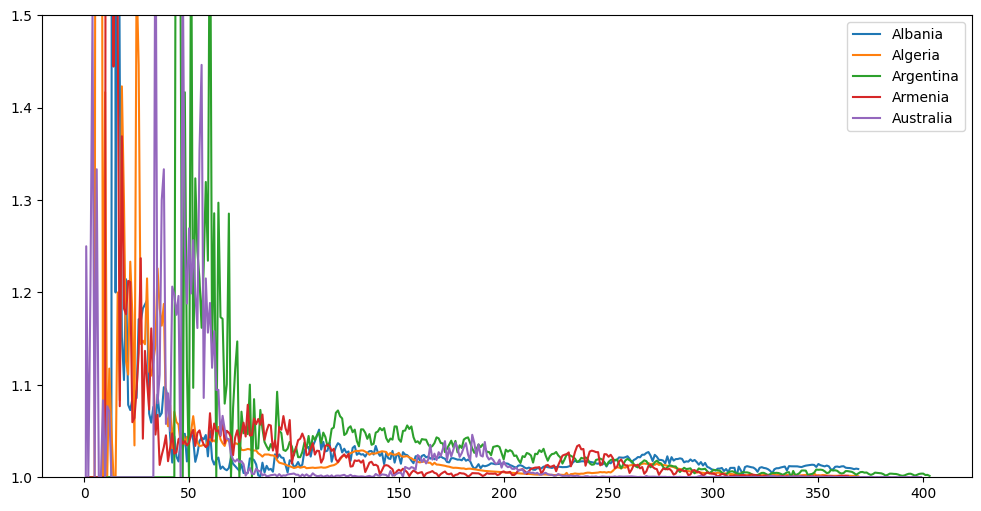

In [119]:
grouped_data = case_data.groupby("EntityId")
fig, ax = plt.subplots(figsize=(12,6))
for i in range(5):
    entity_growth = grouped_data.get_group(i+1).reset_index()
    with sqlite3.connect('data/data.db') as conn:
        cursor = conn.cursor()
        entity_name = cursor.execute("SELECT Entity FROM entity WHERE EntityId = (?)", (i+1,)).fetchall()
    ax.plot(entity_growth["Infection Growth Rate"], label=entity_name[0][0])
plt.ylim(1, 1.5)
plt.legend()
plt.show()
    
    